## 1. Content-based book recommendation

<p>In this notebook, we will lay the groundwork for a content-based book recommendation system that will determine which books are related based on how similar the discussed topics are. The methods we'll use are commonly used in text- or document-heavy industries like legal, technology, or customer support to perform common tasks like text classification or handling search engine queries. We will also be able to observe which books in our dataset these methods work best for.</p>
<p>Let's look at the books that will be used in our recommendation system.</p>

In [2]:
# Import library
import glob

# The books files are contained in this folder
folder = "books/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + '*.txt', recursive=False)
files.sort()
files

['books/AChristmasCarol-CharlesDickens.txt',
 'books/ADollsHouse-HenrikIbsen.txt',
 'books/AModestProposal-JonathanSwift.txt',
 'books/ARoomWithAView-EMForster.txt',
 'books/ATaleOfTwoCities-CharlesDickens.txt',
 'books/AdventuresOfHuckleberryFinn-MarkTwain.txt',
 'books/AlicesAdventuresInWonderland-LewisCarroll.txt',
 'books/Cranford-ElizabethCleghornGaskell.txt',
 'books/CrimeAndPunishment-FyodorDostoyevsky.txt',
 'books/Dracula-BramStoker.txt',
 'books/Frankenstein-MaryWollstonecraftShelley.txt',
 'books/GreatExpectations-CharlesDickens.txt',
 'books/GrimmsFairyTales-JacobGrimmAndWilhelmGrimm.txt',
 'books/HistoryOfTomJonesAFoundling-HenryFielding.txt',
 'books/JaneEyreAnAutobiography-CharlotteBrontë.txt',
 'books/LittleWomen-LouisaMayAlcott.txt',
 'books/Metamorphosis-FranzKafka.txt',
 'books/Middlemarch-GeorgeEliot.txt',
 'books/MobyDick-HermanMelville.txt',
 'books/MyLifeVolume1-RichardWagner.txt',
 'books/PrideAndPrejudice-JaneAusten.txt',
 'books/RomeoandJuliet-WilliamShakespea

## 2. Load the contents of each book into Python
<p>In order to make the downstream analyses easier, we must first load the content of these books into Python and perform some simple pre-processing. Such a group of texts is referred to as a corpus. Additionally, we will keep track of the titles of these books for future use and print out each one's length to get a sense of its content.</p>

In [3]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    data = re.sub('[\W_]+', ' ', f.read())

    # Store the texts and titles of the books in two separate lists
    txts.append(data)
    titles.append(os.path.basename(n).replace(".txt", ""))


# Print the length, in characters, of each book
[len(t) for t in txts]

[169588,
 151869,
 38000,
 375074,
 742278,
 564463,
 154409,
 393473,
 1101812,
 826135,
 426742,
 970475,
 517405,
 1906637,
 996647,
 1023151,
 135146,
 1740312,
 1194459,
 1245227,
 711838,
 152846,
 949397,
 1061068,
 556593,
 391923,
 1870330,
 5044322,
 440039,
 842520,
 275267,
 129818,
 430717,
 489971,
 406978,
 152399,
 49260,
 1311529,
 1472224]

## 3. Find the index of our reference book, Little Women
<p>For the next parts of this analysis, we will often check the results returned by our method for a given book. For consistency, we will refer to Louisa May Alcott's "Little Women". Let's find to which index this book is associated.</p>

In [4]:
# Browse the list containing all the titles
for i in range(len(titles)):
    # Store the index if the title is "OriginofSpecies"
    if (titles[i]=="LittleWomen-LouisaMayAlcott"):
        ori = i


# Print the stored index
print(str(ori))

15


## 4. Tokenize the corpus
<p>The corpus needs to be converted into a format that is simpler to work with for the downstream analyses. Our corpus will be tokenized, or broken down into a list of the individual words (or "tokens") that make up each text. The first 20 tokens from "Little Women" will be printed to verify the output of our process.</p>

In [5]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [txt.lower() for txt in txts]

# Transform the text into tokens 
txts_split = [txt.split() for txt in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

# Print the first 20 tokens for the "On the Origin of Species" book
texts[ori][0:20]

['project',
 'gutenberg',
 'ebook',
 'little',
 'women',
 'by',
 'louisa',
 'm',
 'alcott',
 'this',
 'ebook',
 'use',
 'anyone',
 'anywhere',
 'no',
 'cost',
 'with',
 'almost',
 'no',
 'restrictions']

## 5. Stemming of the tokenized corpus
<p>Now we will use a stemming process, which will group the inflected forms of a word so they can be analysed as a single item: the stem.</p>

In [6]:
import pickle

# Load the Porter stemming function from the nltk package
from nltk.stem import PorterStemmer

# Create an instance of a PorterStemmer object
porter = PorterStemmer()

# For each token of each text, we generated its stem 
texts_stem = [[porter.stem(token) for token in text] for text in texts]

# Save to pickle file
pickle.dump( texts_stem, open( "books/texts_stem.p", "wb" ) )
#texts_stem =  pickle.load( open( "books/texts_stem.p", "rb" ) )


# Print the 20 first stemmed tokens from the "On the Origin of Species" book
texts_stem[ori][0:20]

['project',
 'gutenberg',
 'ebook',
 'littl',
 'women',
 'by',
 'louisa',
 'm',
 'alcott',
 'thi',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'no',
 'cost',
 'with',
 'almost',
 'no',
 'restrict']

## 6. Building a bag-of-words model
<p>
After the texts have been converted into stemmed tokens, we must create models that downstream algorithms can use.</p>
<p>
A dictionary, which we refer to as a universe of all the words in our corpus of books, must first be created. Then, for each of our texts, we will construct a bag-of-words model (BoW) using the stemmed tokens and a dictionary. Our books will be represented by the BoW models as a list of all unique tokens they contain along with the number of instances they have.</p>
<p>We will print the first five components of one of the "Little Women" BoW models to help us better understand the structure of such a model.</p>

In [8]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows =  [dictionary.doc2bow(text) for text in texts_stem]

# Print the first five elements of the On the Origin of species' BoW model
bows[ori][0:5]

[(0, 1), (1, 92), (2, 1), (4, 1), (6, 10)]

## 7. The most common words of a given book
<p>In order to better understand how the model has been generated and visualize its content, we will transform the bag-of-words model into a DataFrame and display the 10 most common stems for our reference book.</p>

In [9]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_origin = pd.DataFrame(bows[ori])

# Add the column names to the DataFrame
df_bow_origin.columns = ["index", "occurrences"]

# Add a column containing the token corresponding to the dictionary index
df_bow_origin["token"] = [dictionary[index] for index in df_bow_origin["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin.sort_values(by="occurrences", ascending=False).head(10)

,index,occurrences,token
1203,1498,3349,her
1359,1695,2923,it
2839,3555,2486,you
2208,2753,2371,she
2696,3383,2106,wa
2790,3500,1925,with
2471,3093,1710,t
1181,1472,1626,he
2115,2641,1558,s
361,437,1483,but


## 8. Create a tf-idf model 
<p>With a few notable exceptions, the most frequently occurring words are very common and unlikely to convey any information unique to the particular book. To identify which tokens are most specific to a book, we must take an additional step. </p> 
<p> To do this, we'll make use of a tf-idf model. (Inverse document frequency-term frequency). The frequency of each word in this text compared to its rarity in all other documents is used by this model to determine its significance. As a result, a word with a high tf-idf score will be considered unique to this text. </p>
<p>
We will print the 10 words most relevant to our reference book after calculating those scores (i.e., the 10 words with the highest tf-idf score).
</p>

In [10]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "On the Origin of Species"
model[bows[ori]]

[(29, 0.000529796180023263),
 (32, 0.0004515270966579528),
 (36, 0.00014678681188738402),
 (38, 0.0006293455842631975),
 (39, 0.0002648980900116315),
 (40, 0.00022104411811034002),
 (45, 0.00038438134888006404),
 (47, 0.0001250406175336975),
 (48, 0.00017378804074940935),
 (50, 0.0002070200436205745),
 (51, 0.0016123772934006),
 (53, 0.00024913460401074764),
 (54, 0.00023137986411693307),
 (56, 0.0001148622284740535),
 (59, 0.00251399464047209),
 (61, 0.00020322905908890594),
 (62, 0.0004307333567777007),
 (65, 0.00011982560638073553),
 (66, 0.0001505090322193176),
 (67, 0.0005590943363165539),
 (69, 0.0010051540040337038),
 (70, 2.264860036461342e-05),
 (71, 2.2036177534946007e-05),
 (72, 0.00011324300182306711),
 (73, 0.000489491009982487),
 (75, 0.0008689402037470467),
 (76, 0.0003350513346779012),
 (77, 0.0006701026693558024),
 (78, 0.0011032055165372528),
 (79, 0.0003312320697929192),
 (81, 0.0004457969842505737),
 (83, 0.001062475613384995),
 (84, 0.0002864703079542981),
 (89, 0.

## 9. The results of the tf-idf model
<p>Once again, the format of those results is hard to interpret for a human. Therefore, we will transform it into a more readable version and display the 10 most specific words for the "Little Women" book. </p>

In [11]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[ori]])

# Name the columns of the DataFrame id and score
df_tfidf.columns=["id", "score"]

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = [dictionary[i] for i in list(df_tfidf["id"])]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.sort_values(by="score", ascending=False).head(10)

,id,score,token
4576,9613,0.608765,jo
6435,19299,0.471561,lauri
6488,19352,0.438294,meg
6070,18934,0.308982,beth
4978,11478,0.288905,ami
6073,18937,0.075910,bhaer
6434,19298,0.070862,laurenc
4557,9482,0.068178,hannah
6757,19621,0.053674,teddi
6478,19342,0.037572,marme


## 10. Calculate the distance between texts
<p>
Now, the tf-idf algorithm yields stemmed tokens that are unique to each book. We can now determine how closely related books are to one another because we have a model that links tokens to their degree of specificity to each individual book. </p>
<p>
For this, we'll use a similarity metric called "cosine similarity," and we'll display the findings as a distance matrix, or a matrix that displays all pairwise distances between the books.
</p>

In [12]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])

# Transform the resulting list into a DataFrame
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the DataFrame
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df

,AChristmasCarol-CharlesDickens,ADollsHouse-HenrikIbsen,AModestProposal-JonathanSwift,ARoomWithAView-EMForster,ATaleOfTwoCities-CharlesDickens,AdventuresOfHuckleberryFinn-MarkTwain,AlicesAdventuresInWonderland-LewisCarroll,Cranford-ElizabethCleghornGaskell,CrimeAndPunishment-FyodorDostoyevsky,Dracula-BramStoker,...,TheExpeditionOfHumphryClinker-TSmollett,TheGreatGatsby-FScottFitzgerald,TheImportanceOfBeingEarnest-OscarWilde,ThePictureOfDorianGray-OscarWilde,TheScarletLetter-NathanielHawthorne,TheSoulsOfBlackFolk-WEBDuBois,TheStrangeCaseOfDrJekyllAndMrHyde-RobertLouisStevenson,TheYellowWallpaper-CharlottePerkinsGilman,TwentyYearsAfter-AlexandreDumas,Ulysses-JamesJoyce
AChristmasCarol-CharlesDickens,1.000000,0.000305,0.001607,0.001165,0.002061,0.003929,0.000936,0.002533,0.001083,0.001659,...,0.005038,0.001744,0.000367,0.001115,0.001733,0.002895,0.000984,0.002182,0.000593,0.006886
ADollsHouse-HenrikIbsen,0.000305,0.999999,0.000334,0.000877,0.000727,0.001785,0.000433,0.000545,0.000651,0.000585,...,0.001262,0.000948,0.000286,0.000506,0.000338,0.000622,0.000474,0.001225,0.000172,0.001988
AModestProposal-JonathanSwift,0.001607,0.000334,1.000000,0.002769,0.004534,0.006396,0.001947,0.002866,0.002297,0.030320,...,0.050738,0.001759,0.001265,0.002221,0.010072,0.023209,0.003135,0.009259,0.002136,0.037707
ARoomWithAView-EMForster,0.001165,0.000877,0.002769,0.999999,0.041651,0.007355,0.002280,0.004372,0.002954,0.104395,...,0.009585,0.006845,0.001654,0.011251,0.004013,0.007287,0.002312,0.010251,0.001428,0.016274
ATaleOfTwoCities-CharlesDickens,0.002061,0.000727,0.004534,0.041651,1.000000,0.010540,0.002402,0.003714,0.003220,0.026526,...,0.015908,0.003791,0.001322,0.003515,0.006331,0.010953,0.003711,0.004901,0.010049,0.014842
AdventuresOfHuckleberryFinn-MarkTwain,0.003929,0.001785,0.006396,0.007355,0.010540,1.000000,0.008916,0.005165,0.008309,0.014149,...,0.022201,0.028002,0.002767,0.019534,0.004686,0.059581,0.002888,0.022925,0.007998,0.052036
AlicesAdventuresInWonderland-LewisCarroll,0.000936,0.000433,0.001947,0.002280,0.002402,0.008916,1.000000,0.001558,0.002505,0.002628,...,0.006031,0.003704,0.000863,0.005087,0.001167,0.002817,0.001023,0.005179,0.002602,0.013068
Cranford-ElizabethCleghornGaskell,0.002533,0.000545,0.002866,0.004372,0.003714,0.005165,0.001558,1.000000,0.002065,0.003745,...,0.010921,0.002867,0.001188,0.002287,0.002788,0.005282,0.002049,0.005888,0.001079,0.010911
CrimeAndPunishment-FyodorDostoyevsky,0.001083,0.000651,0.002297,0.002954,0.003220,0.008309,0.002505,0.002065,1.000002,0.003664,...,0.006738,0.003825,0.000960,0.002742,0.002496,0.006043,0.001985,0.005472,0.001383,0.007573
Dracula-BramStoker,0.001659,0.000585,0.030320,0.104395,0.026526,0.014149,0.002628,0.003745,0.003664,1.000001,...,0.015227,0.004989,0.002798,0.004498,0.006670,0.011200,0.006213,0.007534,0.002773,0.027718


## 11. The book that "Little Women" is most similar to
<p>
All of the similarity measures between the books in our dataset are now represented in a matrix. Now that we have this matrix, we can quickly extract the data we require—namely, the distance between one book and one or more others. </p>
<p>
In order to show which books are most comparable to "Little Women," we will start by creating a bar chart that ranks all of the books according to how similar they are to our reference work.
</p>

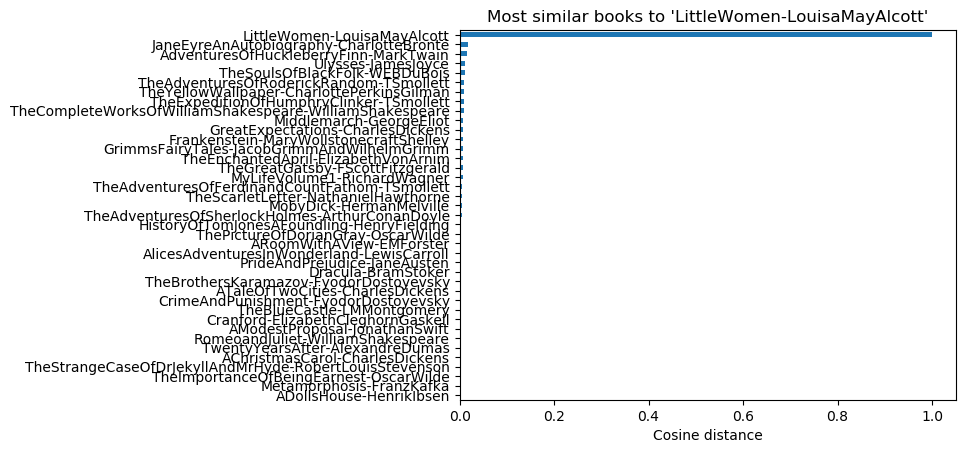

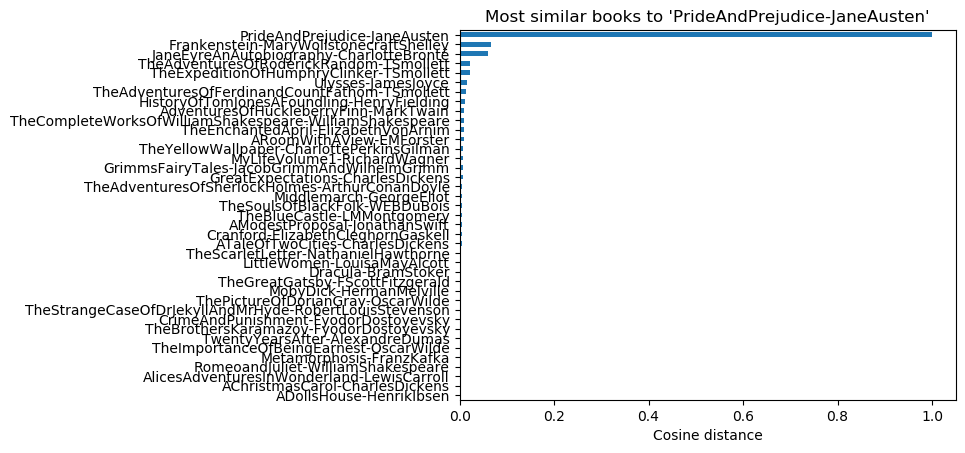

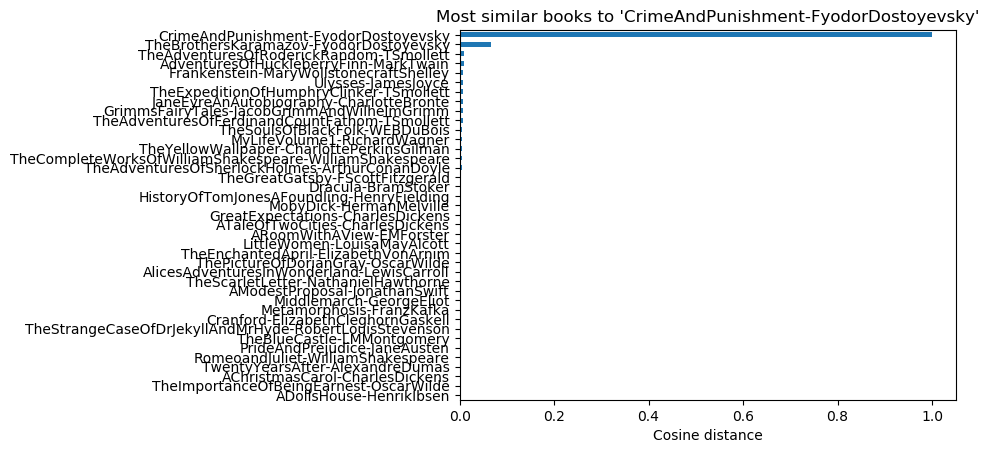

Text(0.5, 1.0, "Most similar books to 'TheImportanceOfBeingEarnest-OscarWilde'")

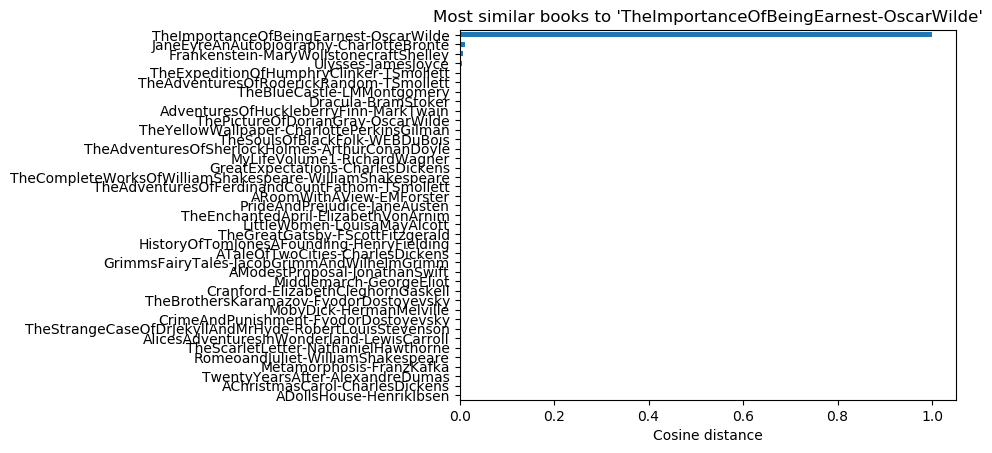

In [27]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import the needed functions from matplotlib
import matplotlib.pyplot as plt


# Select the column corresponding to "Little Women" and 
v = sim_df["LittleWomen-LouisaMayAlcott"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'LittleWomen-LouisaMayAlcott'")
plt.show()

plt.clf()
# Select the column corresponding to "PrideAndPrejudice-JaneAusten"" and 
v = sim_df["PrideAndPrejudice-JaneAusten"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'PrideAndPrejudice-JaneAusten'")

plt.show()

plt.clf()
# Select the column corresponding to "CrimeAndPunishment-FyodorDostoyevsky" and 
v = sim_df["CrimeAndPunishment-FyodorDostoyevsky"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'CrimeAndPunishment-FyodorDostoyevsky'")

plt.show()

plt.clf()
# Select the column corresponding to "TheImportanceOfBeingEarnest-OscarWilde" and  ThePictureOfDorianGray-OscarWilde
v = sim_df["TheImportanceOfBeingEarnest-OscarWilde"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'TheImportanceOfBeingEarnest-OscarWilde'")




## 12. Which books share similar content?
<p>
This turns out to be very helpful if we want to identify the book that most closely resembles another one. For instance, we just noticed that our model suggested reading "Jane Eyre" if you liked "Pride and Prejudice." It suggested a different work by Fyodor Dostoevsky in reference to "Crime and Punishment." So far, the outcomes make sense. </p>
Understanding the subtleties of the books is one area where the model does not appear to work well. For instance, "Jane Eyre," a novel that isn't typically categorized as humorous, is shown to be most similar to Oscar Wilde's comedy "The Importance of Being Earnest."
<p>
Now that we've seen the big picture, we want to see how the books are generally connected to one another. To achieve this, the entire similarity matrix will be represented as a dendrogram, a common tool for displaying such data. <strong> The information regarding book similarities will be displayed all at once using the final method. </strong> </p>

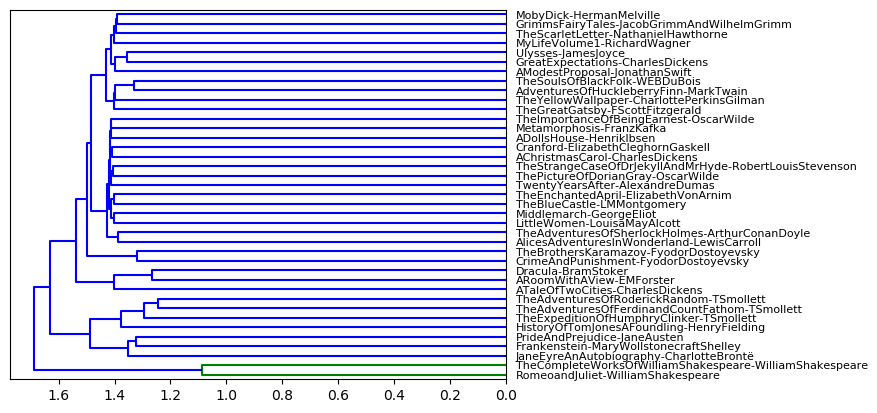

In [14]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
a = hierarchy.dendrogram(Z,  leaf_font_size=8, labels=sim_df.index,  orientation="left")